In [125]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import numpy as np
import tensorflow as tf

np.random.seed(5005)
tf.set_random_seed(5005)

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.layers.normalization import BatchNormalization

In [126]:
## PREPARE MNIST

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

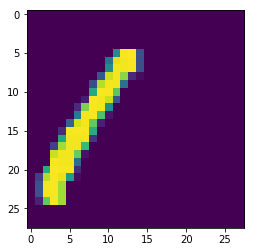

In [127]:
x = x_train[3]
x = np.roll(x, -7, axis=1)
y = y_train[3, :]
plt.imshow(x[:, :, 0])

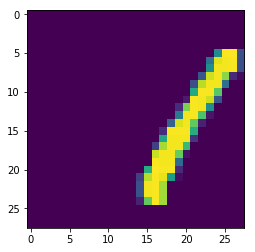

In [128]:
x_shifted = np.roll(x, 13, axis=1)
plt.imshow(x_shifted[:, :, 0])

## How a standard Multilayered Perceptron (Dense Layer) perceives MNIST:

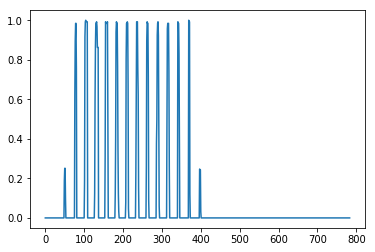

In [129]:
plt.plot(x.reshape(-1, order='F'))

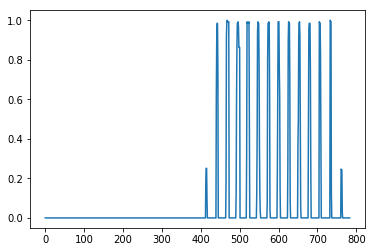

In [ ]:
plt.plot(x_shifted.reshape(-1, order='F'))

# Convolutional Neural Networks
## ... are shift invariant
## ... detect local patterns
http://cs231n.github.io/assets/conv-demo/index.html

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
  640/60000 [..............................] - ETA: 4:42 - loss: 0.0286 - acc: 0.9938

##  Improvement suggestion 1: Use Multiple Convolutional Layers

In [ ]:
#TODO

##  Improvement suggestion 2: Use standard building block:
Convolutional => Batch Normalization => ReLU => Pooling

In [ ]:
#TODO